# Retrieving Data From the Web

In this lesson, we'll look at different options and techniques for retrieving data sets from the Internet. 

## Using HTTP

Hypertext Transfer Protocol (HTTP) is a set of instructions and rules that dictate how files are transfered across the internet. At its core, HTTP is a fairly simple protocol that consists of a 'requests' and 'responses'.

The most common request is called a GET request, and is used to simply get some data from a web server. When you visit a simple web page, your browser sends a GET request to a server somewhere, and that server will respond with (for example) an HTML file that is rendered by the browser, as well as a 'response code', such as 200.

HTTP requests can be supplemented with additional data to let the server know how it should respond. Where that additional data appears and what it is called is often dictated by the type of request you send.

For example, have you ever seen a URL that looks like this:

    https://www.google.com/search?q=data+science
 
When this URL is visited in your browser, a GET request is sent to the HOST *www.google.com*. The PATH, */search* routes your request to a specific endpoint on the server, and the *?q=data+science* portion, which is referred to as URL *Arguments*, tells that endpoint that you wish to *q*uery the term *data science*.

Assuming that the server is working correctly, and the arguments are what it expects, it will process that request and send back an appropriate response.

Try it out by visiting the URL.

The request/response paradigm that is HTTP - the one you use every day in your browser - can be implemented programatically using Python.

In [1]:
import requests

# The requests library (available on the Python Package Index) is one of the most commonly
# used for interacting with the web due to it's robust, yet simple API.

host = 'https://www.google.com'
path = '/search'
args = {'q': 'data science'}

resp = requests.get(host + path, params=args)
resp

<Response [200]>

In [2]:
# As you can see, we sent a request and got back a response with the code 200,
# which means everything went OK. Now, we can inspect that Response object.
print(resp.status_code)
print(resp.reason)
resp_text = resp.text

200
OK


In [3]:
# We can inspect the first 100 characters of the response text to reveal that it is an HTML document
resp_text[:100]

'<!doctype html><html itemscope="" itemtype="http://schema.org/SearchResultsPage" lang="en"><head><me'

## Parsing HTML with BeautifulSoup

BeautifulSoup is very popular and easy to use library that helps to parse various typs of markup languages, including HTML. One of the most common ways that we will use it is to retrieve tables from the internet, and convert them to Pandas DataFrames. Let's take a crack at it.

In [4]:
import bs4 #BeautifulSoup version 4
import pandas as pd

# A table that contains HTTP Response Codes is available at this web page
url = 'https://developer.yahoo.com/social/rest_api_guide/http-response-codes.html'

# Let's send a GET request to retrive the HTML
resp = requests.get(url)
resp_text = resp.text
resp_text[:100]

'\n<!DOCTYPE html PUBLIC "-//W3C//DTD HTML 4.01//EN" "http://www.w3.org/TR/html4/strict.dtd">\n<html la'

In [5]:
# Now, we can create a BeautifulSoup object to parse the HTML
soup = bs4.BeautifulSoup(resp_text, 'html5lib') # Let's BeautifulSoup know that we're working with HTML

# Let's inspect our soup so we know what we're looking for
soup

<!DOCTYPE html PUBLIC "-//W3C//DTD HTML 4.01//EN" "http://www.w3.org/TR/html4/strict.dtd">
<html class="ydn-content-bg" lang="en"><head>
        <meta content="text/html; charset=utf-8" http-equiv="Content-Type"/>
                <meta content="HTTP Response Status Codes" name="description"/>
                        <!-- doc css start--><link href="https://s.yimg.com/lq/combo?/yui/2.6.0/build/reset-fonts-grids/reset-fonts-grids.css&amp;/yui/2.6.0/build/menu/assets/skins/sam/menu.css&amp;/yui/2.6.0/build/button/assets/skins/sam/button.css&amp;/yui/2.6.0/build/container/assets/skins/sam/container.css&amp;/yui/2.6.0/build/resize/assets/skins/sam/resize.css&amp;/yui/2.6.0/build/tabview/assets/skins/sam/tabview.css&amp;/ydn/site/yui-2.6.0-treeview-ssl.css&amp;" rel="stylesheet" type="text/css"/>

<link href="/common/css/ydn_ssl.css" rel="stylesheet" type="text/css"/>
<link href="/common/css/ydn_header3.css" rel="stylesheet" type="text/css"/>
<link href="/common/css/ydn_footer2.css" rel="sty

In [6]:
# We can see that there is an HTML 'div' with the id "http-response-codes", and that that div
# contains the table we seek, so let's grab it
rc_div = soup.find('div', attrs={'id': 'http-response-codes'})
rc_div

<div class="appendix" id="http-response-codes" title="Appendix A. HTTP Response Status Codes">
   <div class="titlepage">
      <div>
         <div>
            <h2 class="title">Appendix A. HTTP Response Status Codes</h2>
         </div>
      </div>
   </div>
   <p>The following table lists the HTTP response status codes for the
          <code class="literal">GET</code> (retrieve), <code class="literal">POST</code> (create), <code class="literal">PUT</code> (modify), and <code class="literal">DELETE</code> operations of the Yahoo Social  APIs.
          
   </p>
   <div class="informaltable">
      <table border="1">
         <colgroup>
            <col/>
            <col/>
            <col/>
            <col/>
         </colgroup>
         <thead>
            <tr>
               <th align="center">Response Code</th>
               <th align="center">HTTP Operation</th>
               <th align="center">Response Body Contents</th>
               <th align="center">Description</th>
 

In [7]:
# Upon inspection of the response code div, we see the table, and that the 
# data we want is contained in each of the 'tr' (table row) tags of the tbody, so let's iterate
# through the rows, and append the data to a list.
data = []
tbody = rc_div.find('tbody')
for row in tbody.find_all('tr'):
    details = row.find_all('td')
    data.append([td.text.strip() for td in details])
data[0]

['200', 'GET, PUT, DELETE', 'Resource', 'No error, operation successful.']

In [8]:
# And that the table headers are contained in the thead
headers = [h.text.strip() for h in rc_div.find('thead').find_all('th')]
headers

['Response Code', 'HTTP Operation', 'Response Body Contents', 'Description']

In [9]:
# Now, let's create our DataFrame
rc_df = pd.DataFrame(data, columns=headers)
rc_df

,Response Code,HTTP Operation,Response Body Contents,Description
0,200,"GET, PUT, DELETE",Resource,"No error, operation successful."
1,201 Created,POST,Resource that was created,Successful creation of a resource.
2,202 Accepted,"POST, PUT, DELETE",N/A,The request was received.
3,204 No Content,"GET, PUT, DELETE",N/A,"The request was processed successfully, but no..."
4,301 Moved Permanently,GET,XHTML with link,Resource has moved.
5,303 See Other,GET,XHTML with link,Redirection.
6,304 Not Modified,conditional GET,N/A,Resource has not been modified.
7,400 Bad Request,"GET, POST, PUT, DELETE",Error Message,Malformed syntax or a bad query.
8,401 Unauthorized,"GET, POST, PUT, DELETE",Error Message,Action requires user authentication.
9,403 Forbidden,"GET, POST, PUT, DELETE",Error Message,Authentication failure or invalid Application ID.


## Interacting with RESTful Interfaces

As you learned above, getting and parsing HTML, while a valuable skill to have, can sometimes be a pain. Thankfully, there will be an alternative in many cases.

One of the most common ways to retrive data via the Internet is by sending requests to a Representational State Transfer (REST) web service. These services or interfaces are often designed solely as a way to transfer data in a format that is easy to parse, understand, and work with. Luckily, they use the HTTP standard, so we can interact with them the same way we interact with normal web resources.

Many of these services will require you to register before you may send calls to them. Once you've registered, you will receive an API Key and/or ID that must be sent with all calls.

A great directory of available APIs can be found at https://any-api.com

Below, we'll interact with the SchoolDigger API to retrieve data about schools in Augusta.

In [10]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Docs for this API can be found at https://developer.schooldigger.com/docs
sd_host = 'https://api.schooldigger.com'
sd_schools_endpoint = '/v1/schools'

# ID and Key I got when I registered. Since I signed up for the free account, the 
# data we get back will be fake :-(
sd_appid = 'c4d67014'
sd_appky = 'da3fffa0f9367b092dc007fe9764546e'

# Query parameters the endpoint will accept
query = {
    'st':     'GA',
    'city':   'Augusta',
    'appID':  sd_appid,
    'appKey': sd_appky
}

resp = requests.get(sd_host + sd_schools_endpoint, params=query)
resp

<Response [200]>

In [11]:
# Looks like the response returned a 200, so it went through correctly
# Let's inspect the headers to see what kind of data was returned
resp.headers['Content-Type']

'application/json; charset=utf-8'

In [12]:
# Excellent! By default, the API returns JSON, which is similar to a Python 
# dictionary, and can be converted using the json method
resp_data = resp.json()
resp_data.keys()

dict_keys(['_comment', 'numberOfSchools', 'numberOfPages', 'schoolList'])

In [13]:
# Let's take a look at the schoolList (again, this is fake data)
resp_data['schoolList']

[{'address': {'city': 'Anytown',
   'cityURL': 'https://www.schooldigger.com/go/CA/city/Anytown/search.aspx',
   'html': '123 Main St.<br />Anytown, CA 99999-9999',
   'latLong': {'latitude': 35.47, 'longitude': -92.0},
   'state': 'CA',
   'stateFull': 'California',
   'street': '123 Main St.',
   'zip': '99999',
   'zip4': '9999',
   'zipURL': 'https://www.schooldigger.com/go/CA/zip/99999/search.aspx'},
  'county': {'countyName': 'AnyCounty',
   'countyURL': 'https://www.schooldigger.com/go/CA/county/AnyCounty/search.aspx'},
  'district': {'districtID': '1304380',
   'districtName': 'School District #1987213708',
   'rankURL': 'https://www.schooldigger.com/(pathtorank)',
   'url': 'https://www.schooldigger.com/(pathtoitem)'},
  'hasBoundary': True,
  'highGrade': '12',
  'isCharterSchool': 'No',
  'isMagnetSchool': 'Yes',
  'isPrivate': False,
  'isTitleISchool': 'No',
  'isTitleISchoolwideSchool': '(n/a)',
  'isVirtualSchool': 'No',
  'locationIsWithinBoundary': None,
  'lowGrade': 

In [14]:
# Now that we have some data, we can decide how we would like to format it.
# In this case, let's create a new data set that contains each
# school's demographics by year in a table-like structure (list of dictionaries)

school_data = []
for school in resp_data['schoolList']:
    # Let's get some identifying information first
    sid = school['schoolid']
    name = school['schoolName']
    level = school['schoolLevel']
    # then add an row to school data per year of demographic data
    for row in school['schoolYearlyDetails']:
        # Not all the rows have a year
        year = row['year']
        if not year:
            continue
        new_row = row.copy()
        new_row.update({
            'schoolId': sid, 
            'schoolName': name, 
            'schoolLevel': level
        })
        school_data.append(new_row)
    
school_data[0]

{'numberOfStudents': 753,
 'numberofAfricanAmericanStudents': 73,
 'numberofAsianStudents': 24,
 'numberofHispanicStudents': 36,
 'numberofIndianStudents': 70,
 'numberofPacificIslanderStudents': 89,
 'numberofTwoOrMoreRaceStudents': 69,
 'numberofUnspecifiedRaceStudents': None,
 'numberofWhiteStudents': 26,
 'percentFreeDiscLunch': 9.96,
 'percentofAfricanAmericanStudents': 65.58,
 'percentofAsianStudents': 32.43,
 'percentofHispanicStudents': 58.81,
 'percentofIndianStudents': 71.0,
 'percentofPacificIslanderStudents': 71.07,
 'percentofTwoOrMoreRaceStudents': 65.29,
 'percentofUnspecifiedRaceStudents': None,
 'percentofWhiteStudents': 1.31,
 'pupilTeacherRatio': 18.5,
 'schoolId': '130438001528',
 'schoolLevel': 'High',
 'schoolName': 'School #1385556852',
 'teachersFulltime': 72.0,
 'year': 2016}

In [15]:
# And construct a new DataFrame using the data
school_dem_df = pd.DataFrame(school_data)
school_dem_df

,numberOfStudents,numberofAfricanAmericanStudents,numberofAsianStudents,numberofHispanicStudents,numberofIndianStudents,numberofPacificIslanderStudents,numberofTwoOrMoreRaceStudents,numberofUnspecifiedRaceStudents,numberofWhiteStudents,percentFreeDiscLunch,...,percentofPacificIslanderStudents,percentofTwoOrMoreRaceStudents,percentofUnspecifiedRaceStudents,percentofWhiteStudents,pupilTeacherRatio,schoolId,schoolLevel,schoolName,teachersFulltime,year
0,753,73,24,36,70,89,69,None,26,9.96,...,71.07,65.29,None,1.31,18.5,130438001528,High,School #1385556852,72.0,2016
1,678,45,42,81,40,50,28,None,6,81.77,...,4.59,99.95,None,92.88,16.5,130438001528,High,School #1385556852,79.0,2015
2,233,90,80,57,80,64,33,None,37,NaN,...,61.99,99.23,None,29.70,8.0,139999921266,Private,School #1212551774,17.8,2016
3,960,33,14,29,89,61,67,None,16,NaN,...,87.92,72.70,None,5.37,8.8,139999921266,Private,School #1212551774,17.5,2014
4,23,12,43,65,78,45,54,None,8,71.21,...,76.49,14.21,None,88.18,6.6,130438004211,Alternative,School #2058992670,24.0,2016
5,707,68,83,23,85,78,26,None,28,NaN,...,2.99,72.20,None,28.65,11.0,139999943925,Private,School #922967903,22.4,2016
6,344,91,61,89,49,51,54,None,45,NaN,...,15.82,99.74,None,70.22,9.6,139999943925,Private,School #922967903,25.8,2014
7,818,8,5,91,27,64,52,None,37,NaN,...,62.17,1.53,None,10.65,NaN,130002603498,High,School #1324721965,NaN,2016
8,102,64,52,54,77,27,22,None,15,46.23,...,0.55,26.78,None,64.08,NaN,130002603498,High,School #1324721965,NaN,2015
9,459,62,95,99,34,25,98,None,12,NaN,...,35.60,14.29,None,96.18,9.2,139999921290,Private,School #2110980675,2.6,2016


C:\Users\ctaylo\Anaconda3\envs\YearOfDataSci\lib\site-packages\pandas\plotting\_core.py:1716: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  series.name = label


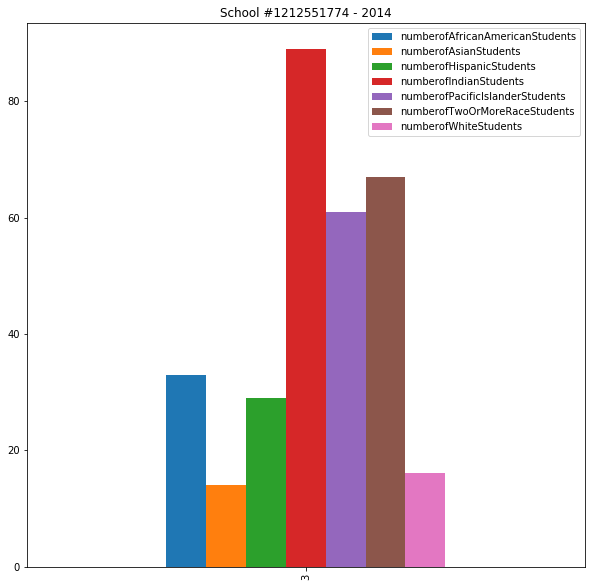

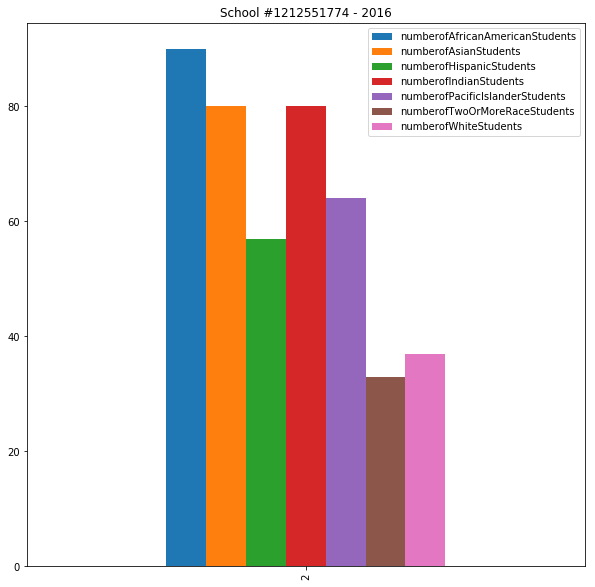

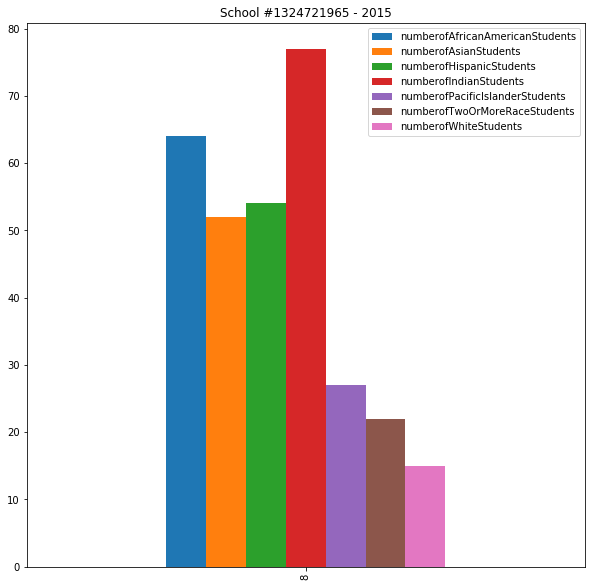

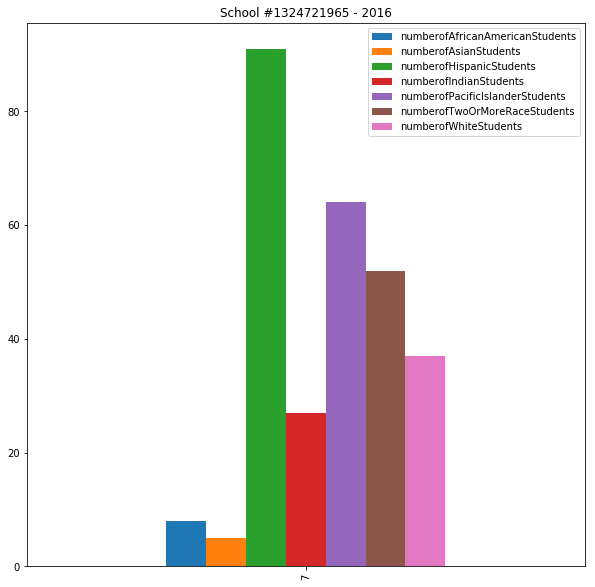

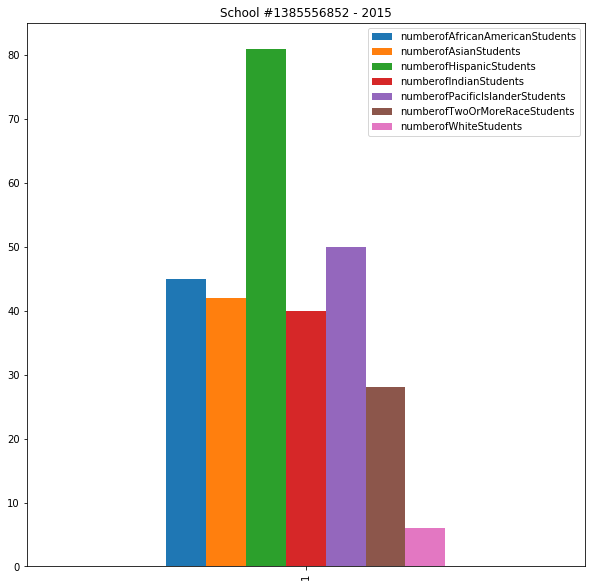

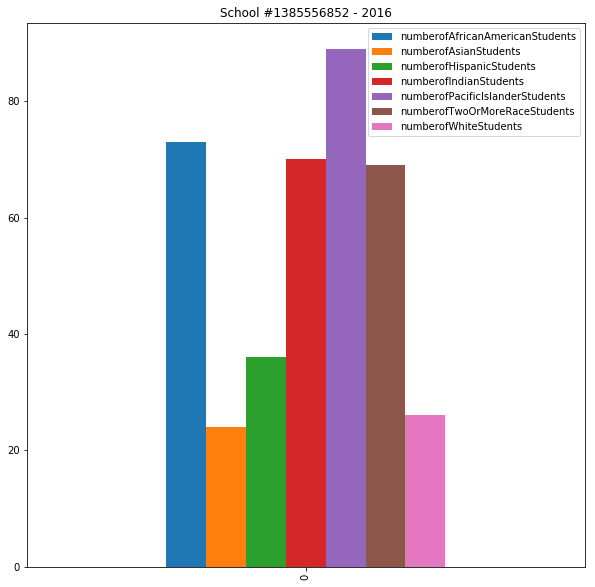

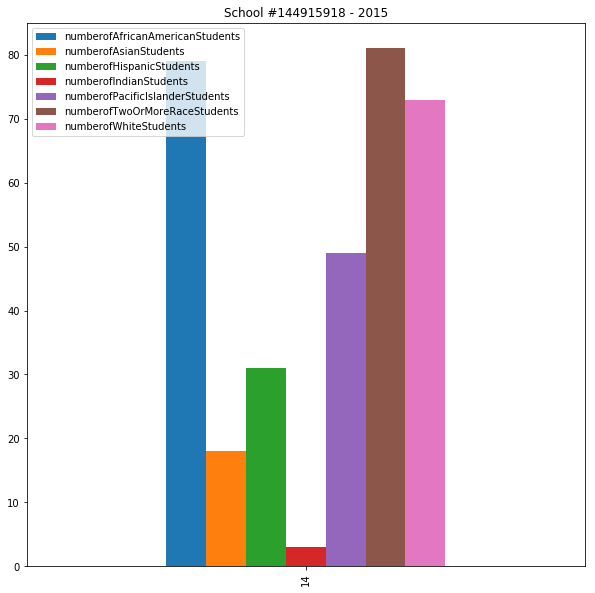

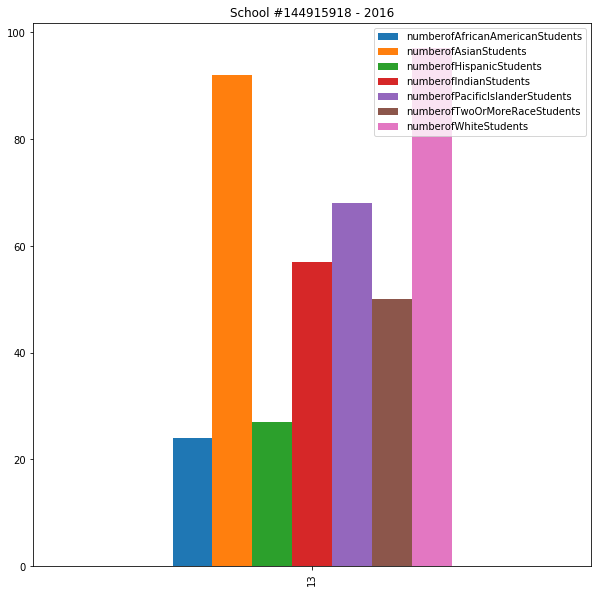

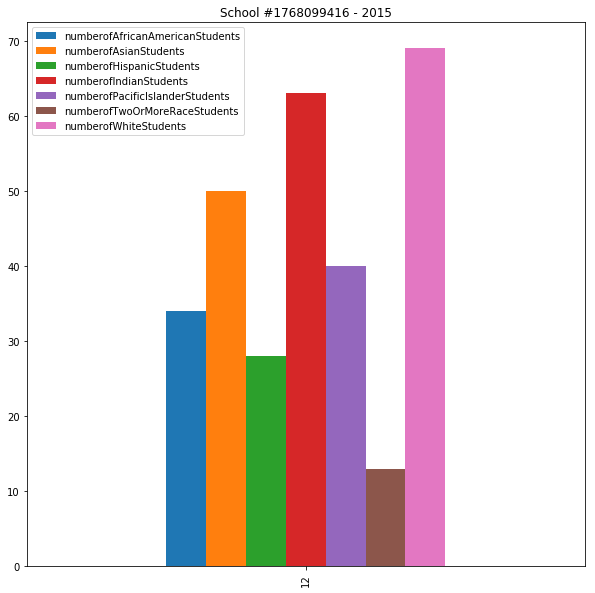

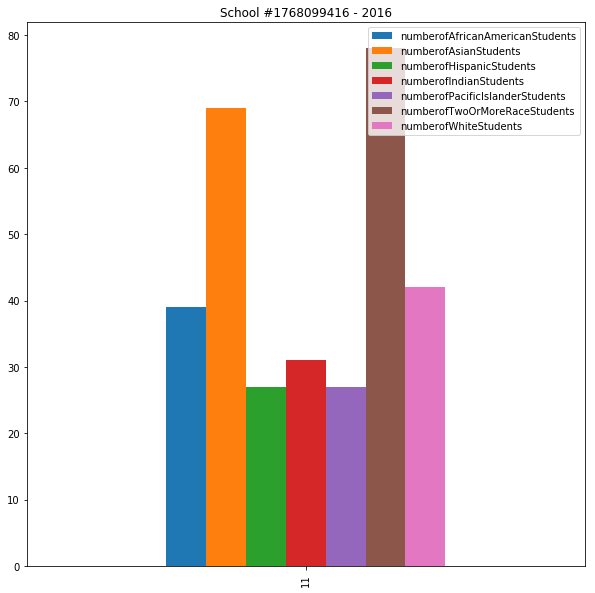

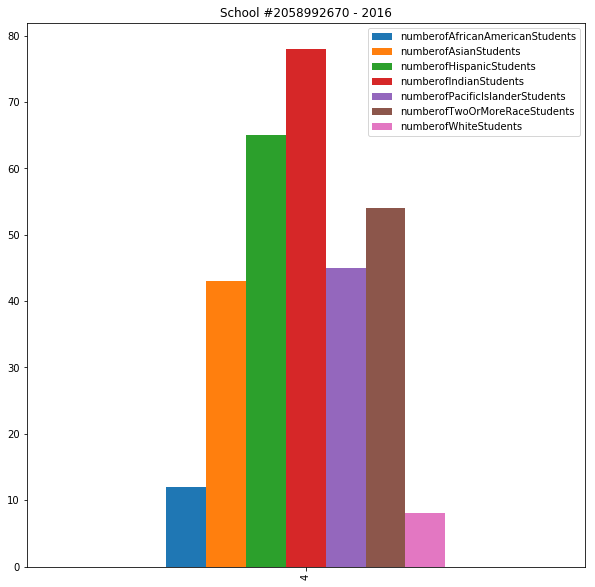

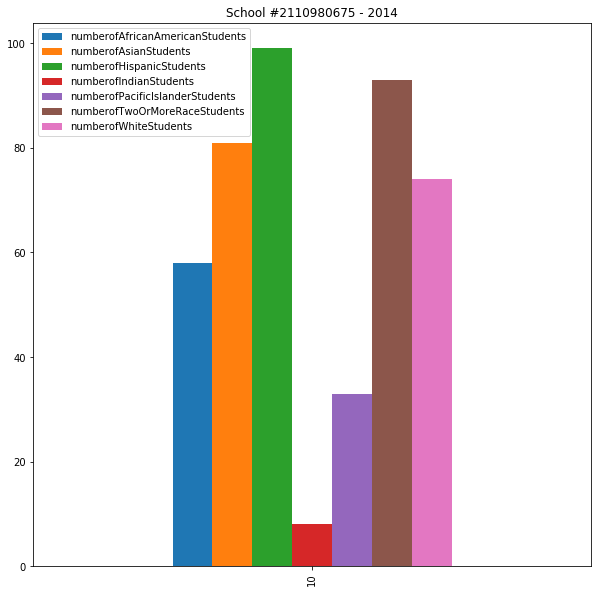

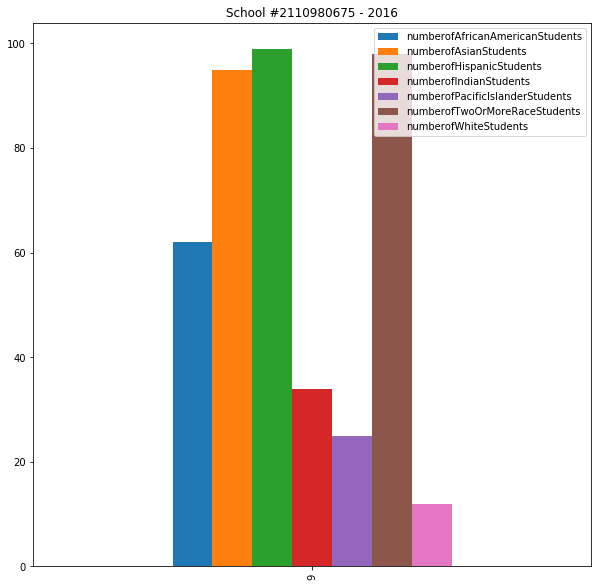

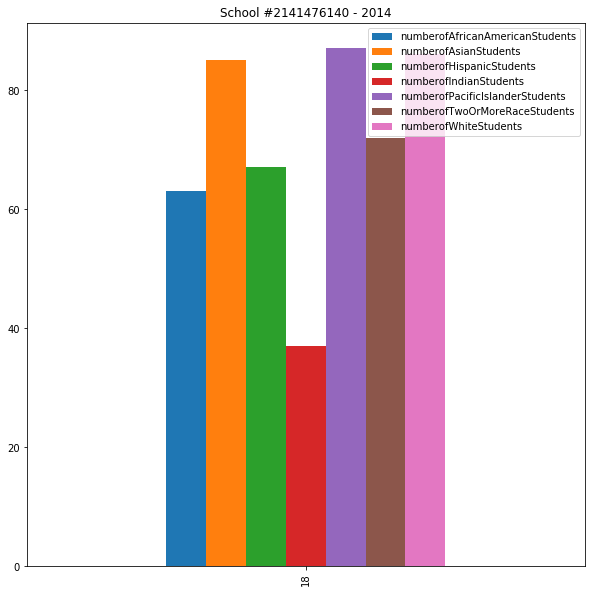

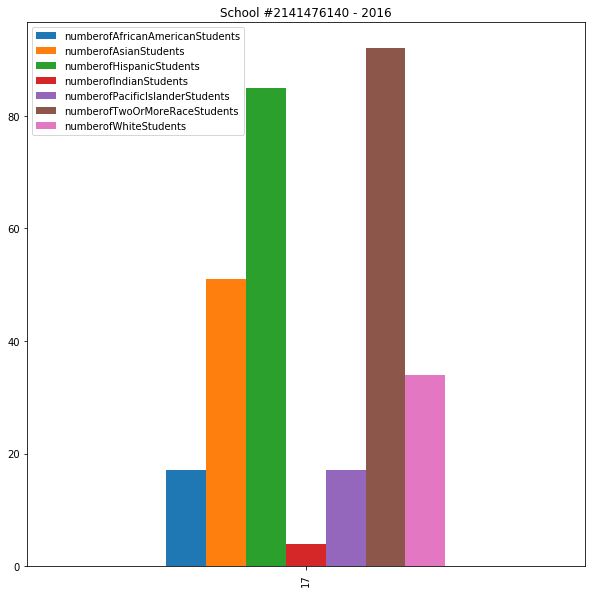

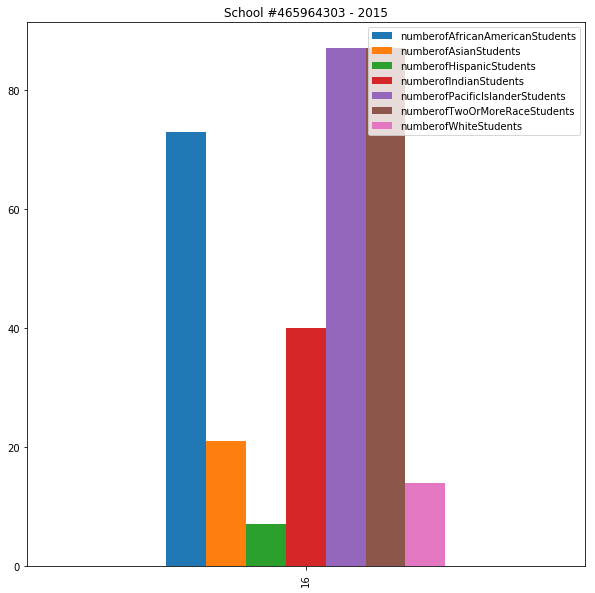

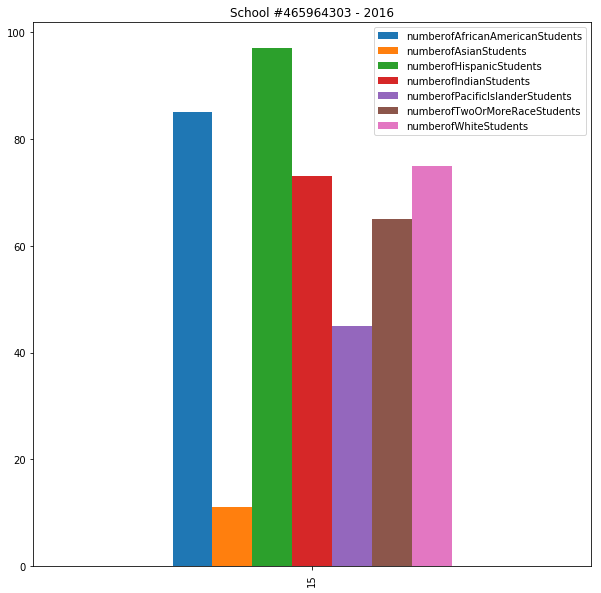

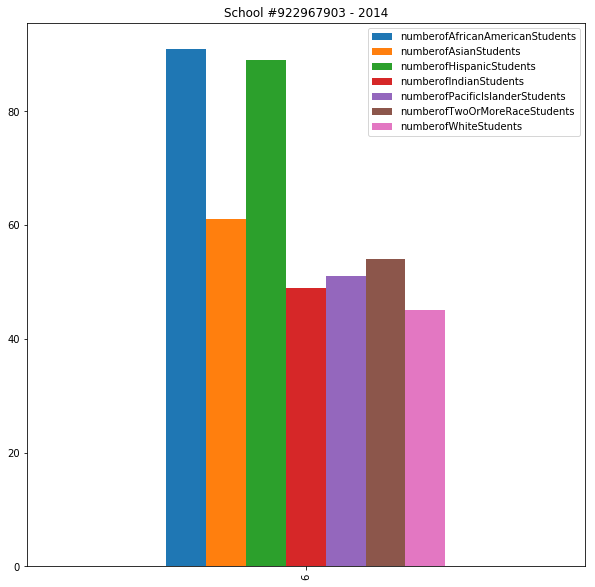

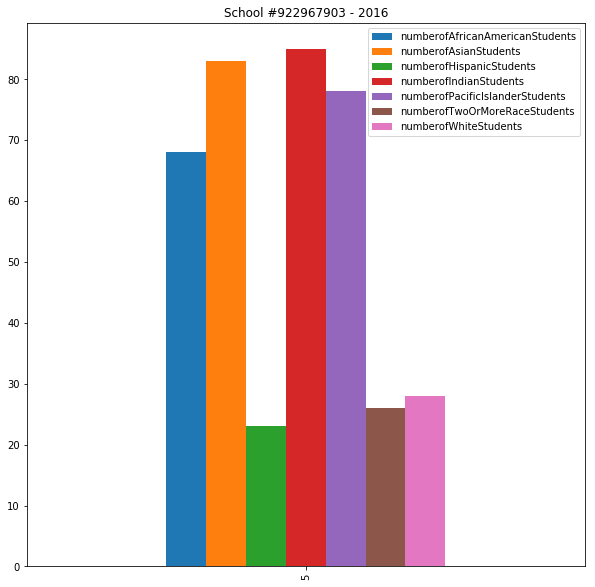

In [16]:
# Now we have some data to work with :-)
plot_columns = [col for col in school_dem_df.columns.tolist() if col.startswith('numberof')]
for school, data in school_dem_df.groupby('schoolName'):
    years = list(data['year'].sort_values())
    for year in years:
        yearly_data = data[data['year'] == year]
        yearly_data.plot(y=plot_columns, kind='bar', figsize=(10, 10), title= school + ' - ' + str(year))
        